In [1]:
import nbsetup
import ergodicpy as ep
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd
from simulations.snowflake.models import Snowflake
import matplotlib.pyplot as plt

In [6]:
ensembles = 50
spikes = 3
trials = 5

def gen_flakes(count):
    ms = []
    for i in range(count):
        nbsetup.cp(count-i)
        ms.append(Snowflake(plot=False, spikes=spikes))
    return ms

models = gen_flakes(ensembles)
trials = gen_flakes(trials)

1


In [7]:
states = 360
histograms = [s.histogram(states=states) for s in models]
ec = ep.ErgodicCollection(histograms)
ec.complexity

0.44520253747029076

In [88]:
data = []

for t, s in enumerate(trials):
    final_pmf = s.histogram(states=states)
    ergodic_pmf = ec.ergodic_pmf()
    
    for d in range(20, int(s.steps), 20):
        nbsetup.cp(t, d)
        current_pmf = s.histogram(states=states, at_point=d)
        swarm_pmf, kls = ec.swarm_pmf(current_pmf, silent=True, with_kls=True)
        mixed_pmf = np.mean([current_pmf/current_pmf.sum(), swarm_pmf/swarm_pmf.sum()], axis=0)
        compare = sp.spatial.distance.jensenshannon
        compare = lambda p,q: sp.stats.entropy(q,p)
        data.append({
            'step': d,
            'trial': t,
            'actual difference (current x final)': compare(final_pmf, current_pmf),
            'frequentist (ergodic x final)': compare(ergodic_pmf, final_pmf),
            'swarm (swarm x final)': compare(swarm_pmf, final_pmf),
            'mixed': compare(mixed_pmf, final_pmf),
            'kls': kls.sum(),
        })



4 880


[(0.0, 3.150745518421187)]

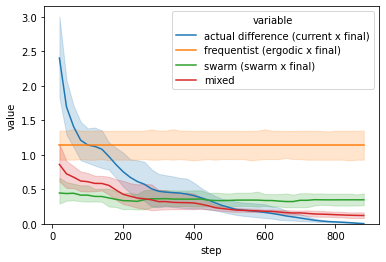

In [89]:
df = pd.DataFrame(data=data)
g = sns.lineplot(data=df.melt(id_vars=['step', 'trial', 'kls']), x='step', y='value', hue='variable')
g.set(ylim=(0, None))

[(0.0, 0.7995670515369285)]

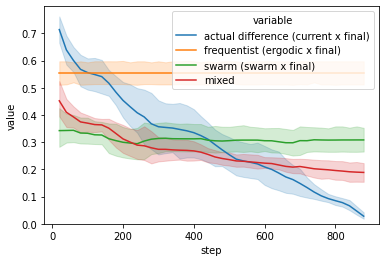

In [81]:
df = pd.DataFrame(data=data)
g = sns.lineplot(data=df.melt(id_vars=['step', 'trial', 'kls']), x='step', y='value', hue='variable')
g.set(ylim=(0, None))

[(0.0, 13.631041019082602)]

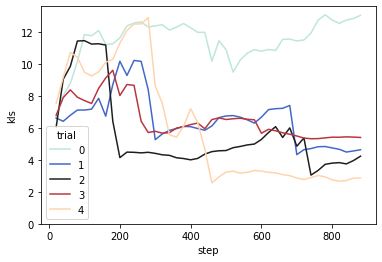

In [75]:
g = sns.lineplot(data=df, x='step', y='kls', hue='trial', palette='icefire')
g.set(ylim=(0,None))

[(0.0, 0.9107821789914922)]

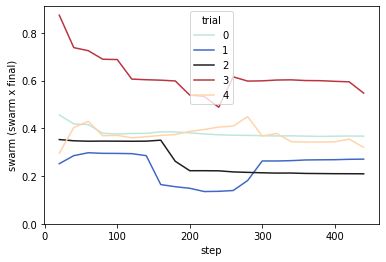

In [72]:
g = sns.lineplot(data=df, x='step', y='swarm (swarm x final)', hue='trial', palette='icefire')
g.set(ylim=(0,None))

4 660


<AxesSubplot:xlabel='step', ylabel='value'>

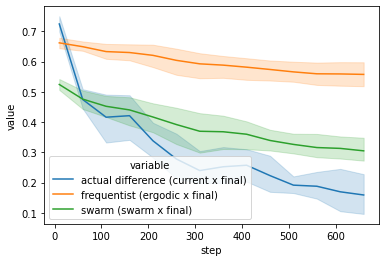

In [37]:
data = []
future = 200

for t, s in enumerate(trials):
    ergodic_pmf = ec.ergodic_pmf()
    
    for d in range(10, s.steps-future, 50):
        nbsetup.cp(t, d)
        final_pmf = s.histogram(states=states, at_point=d+future)
        current_pmf = s.histogram(states=states, at_point=d)
        swarm_pmf, kls = ec.swarm_pmf(current_pmf, silent=True, with_kls=True)
        compare = sp.spatial.distance.jensenshannon
        data.append({
            'step': d,
            'trial': t,
            'actual difference (current x final)': compare(current_pmf, final_pmf),
            'frequentist (ergodic x final)': compare(ergodic_pmf, final_pmf),
            'swarm (swarm x final)': compare(swarm_pmf, final_pmf),
            'kls': kls.sum(),
        })

df = pd.DataFrame(data=data)
sns.lineplot(data=df.melt(id_vars=['step', 'trial', 'kls']), x='step', y='value', hue='variable')